Çevirileri yardım alarak yaptım bu yüzden doğru olup olmadığını bilmiyorum

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [64]:
veri = pd.read_csv("insurance.csv")
print(veri.head())

   age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86


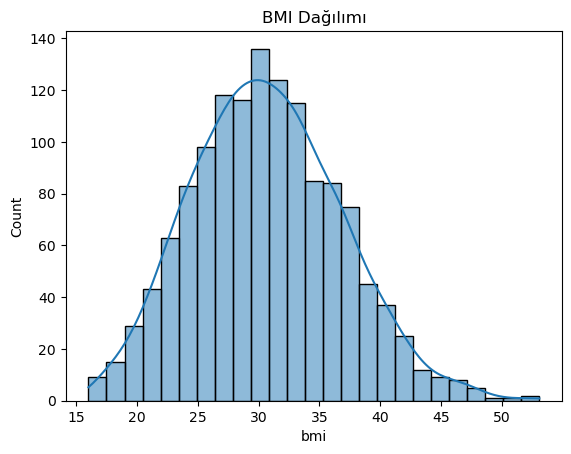

In [49]:
sns.histplot(veri['bmi'], kde=True)
plt.title("BMI Dağılımı")
plt.show()

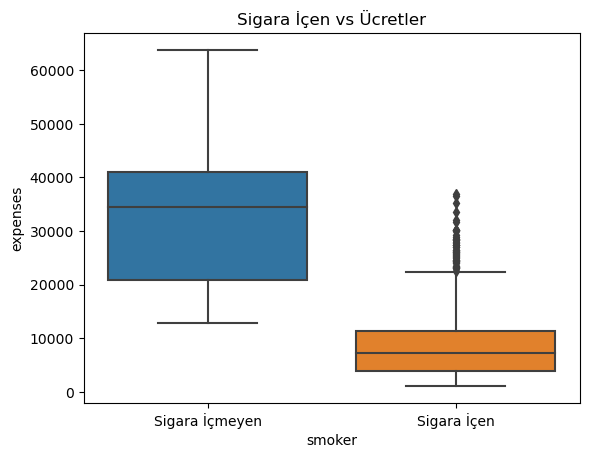

In [51]:
sns.boxplot(x='smoker', y='expenses', data=veri)
plt.title("Sigara İçen vs Ücretler")
plt.xticks(ticks=[0, 1], labels=['Sigara İçmeyen', 'Sigara İçen'])
plt.show()

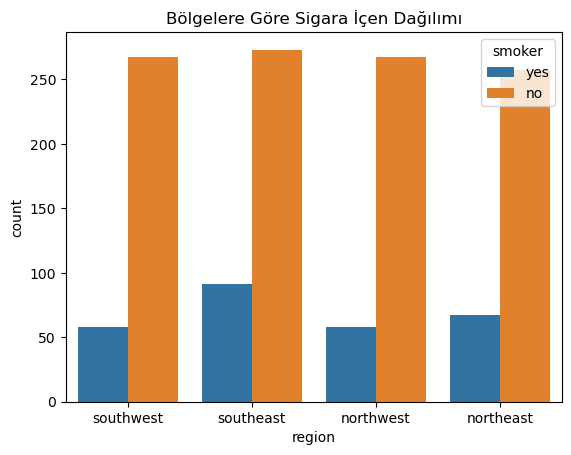

In [52]:
sns.countplot(x='region', hue='smoker', data=veri)
plt.title("Bölgelere Göre Sigara İçen Dağılımı")
plt.show()

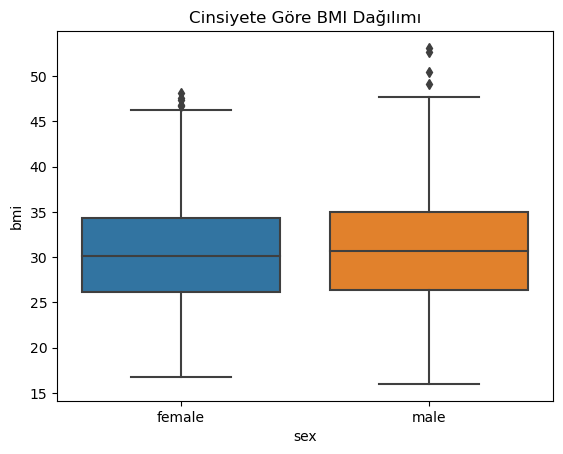

In [53]:
sns.boxplot(x='sex', y='bmi', data=veri)
plt.title("Cinsiyete Göre BMI Dağılımı")
plt.show()

In [54]:
en_cok_cocuk_bolgesi = veri.groupby('region')['children'].sum().idxmax()
print("En fazla çocuk olan bölge:", en_cok_cocuk_bolgesi)

En fazla çocuk olan bölge: southeast


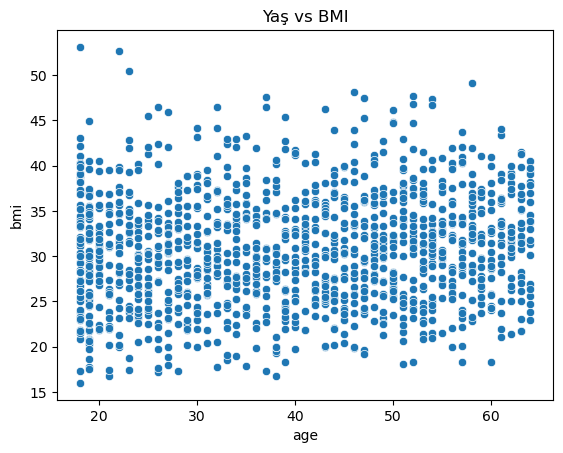

In [55]:
sns.scatterplot(x='age', y='bmi', data=veri)
plt.title("Yaş vs BMI")
plt.show()

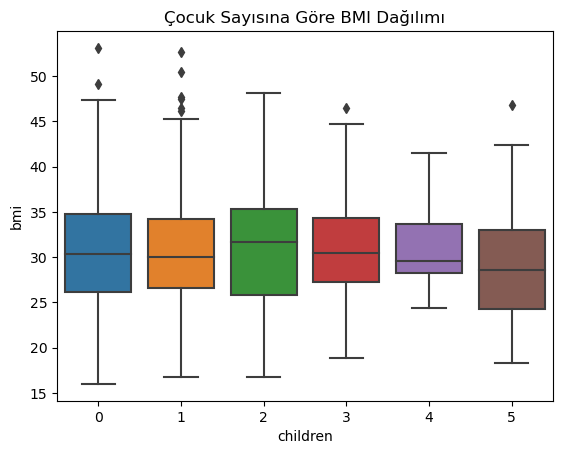

In [56]:
sns.boxplot(x='children', y='bmi', data=veri)
plt.title("Çocuk Sayısına Göre BMI Dağılımı")
plt.show()

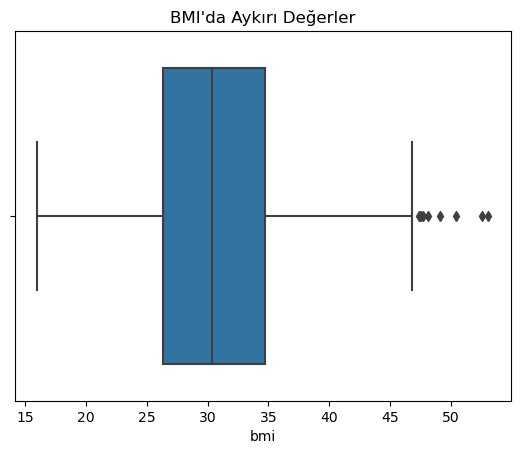

In [57]:
sns.boxplot(x=veri['bmi'])
plt.title("BMI'da Aykırı Değerler")
plt.show()

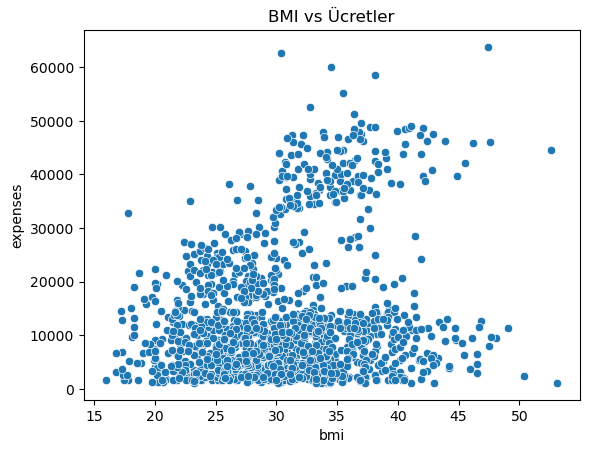

In [59]:
sns.scatterplot(x='bmi', y='expenses', data=veri)
plt.title("BMI vs Ücretler")
plt.show()

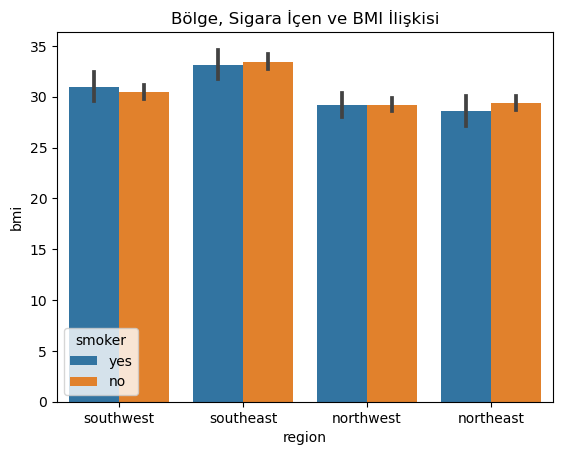

In [60]:
sns.barplot(x='region', y='bmi', hue='smoker', data=veri)
plt.title("Bölge, Sigara İçen ve BMI İlişkisi")
plt.show()

In [68]:
veri = pd.get_dummies(veri, columns=['region'], drop_first=True)

label_encoder = LabelEncoder()
veri['sex'] = label_encoder.fit_transform(veri['sex'])
veri['smoker'] = label_encoder.fit_transform(veri['smoker'])

X = veri.drop('expenses', axis=1)
y = veri['expenses']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [69]:
modeller = {
    'Doğrusal Regresyon': LinearRegression(),
    'Ridge Regresyon': Ridge(),
    'Lasso Regresyon': Lasso(),
    'Rastgele Orman Regresyonu': RandomForestRegressor()
}

for model_adi, model in modeller.items():
    skorlar = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_skorlari = np.sqrt(-skorlar)
    print(f"{model_adi}: Ortalama RMSE = {rmse_skorlari.mean():.2f}, RMSE standart sapma = {rmse_skorlari.std():.2f}")


Doğrusal Regresyon: Ortalama RMSE = 6146.84, RMSE standart sapma = 401.31
Ridge Regresyon: Ortalama RMSE = 6146.75, RMSE standart sapma = 400.51
Lasso Regresyon: Ortalama RMSE = 6146.74, RMSE standart sapma = 401.27
Rastgele Orman Regresyonu: Ortalama RMSE = 4992.31, RMSE standart sapma = 414.06


In [70]:
en_iyi_model = RandomForestRegressor()

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(en_iyi_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

en_iyi_parametreler = grid_search.best_params_
en_iyi_model = grid_search.best_estimator_

In [72]:
y_pred = en_iyi_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("Optimize Edilmiş Rastgele Orman Modeli:")
print("En İyi Hiperparametreler:", en_iyi_parametreler)
print("Kök Ortalama Kare Hata:", rmse)
print("Ortalama Mutlak Hata:", mae)

Optimize Edilmiş Rastgele Orman Modeli:
En İyi Hiperparametreler: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 150}
Kök Ortalama Kare Hata: 4374.94001673498
Ortalama Mutlak Hata: 2463.4920054929526
